In [1]:
import numpy as np
import astropy
from PIL import Image
import os
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Dataset 

In [2]:
dataroot = f"/idia/projects/roadtoska/LoTTS_data/"
datacutout = f"LoTSS_cutouts_asinh"
imgpath = f"{dataroot}{datacutout}"
all_img = os.listdir(imgpath)
n_images = len(all_img)
print(n_images)

7607


## Cutouts

(89, 89, 4)


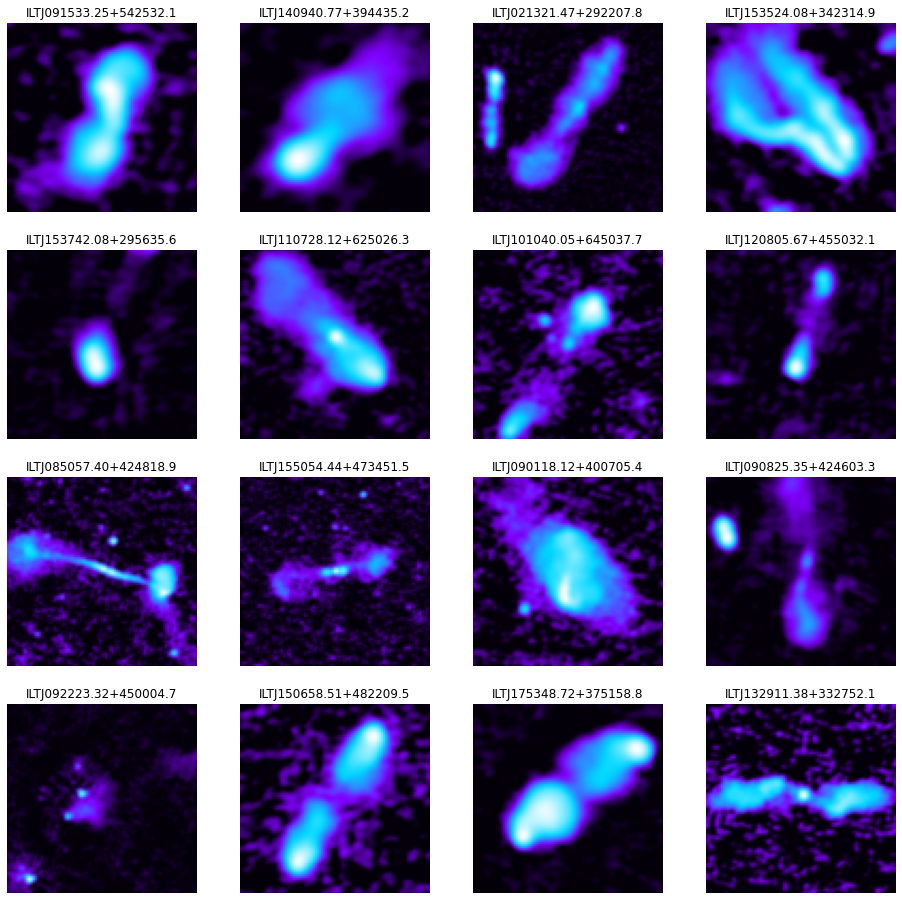

In [4]:
rd_idx = np.random.choice(n_images, size=16, replace=False)
figure(figsize=(16,16))
for i in range(16):
    subplot(4,4,1+i)
    tmp_img = Image.open(f"{imgpath}/{all_img[rd_idx[i]]}", 'r')
    title(all_img[rd_idx[i]][:-4])
    imshow(np.asarray(tmp_img))
    axis('off')
print(np.asarray(tmp_img).shape)

*Resolution changes a lot from image to image !*

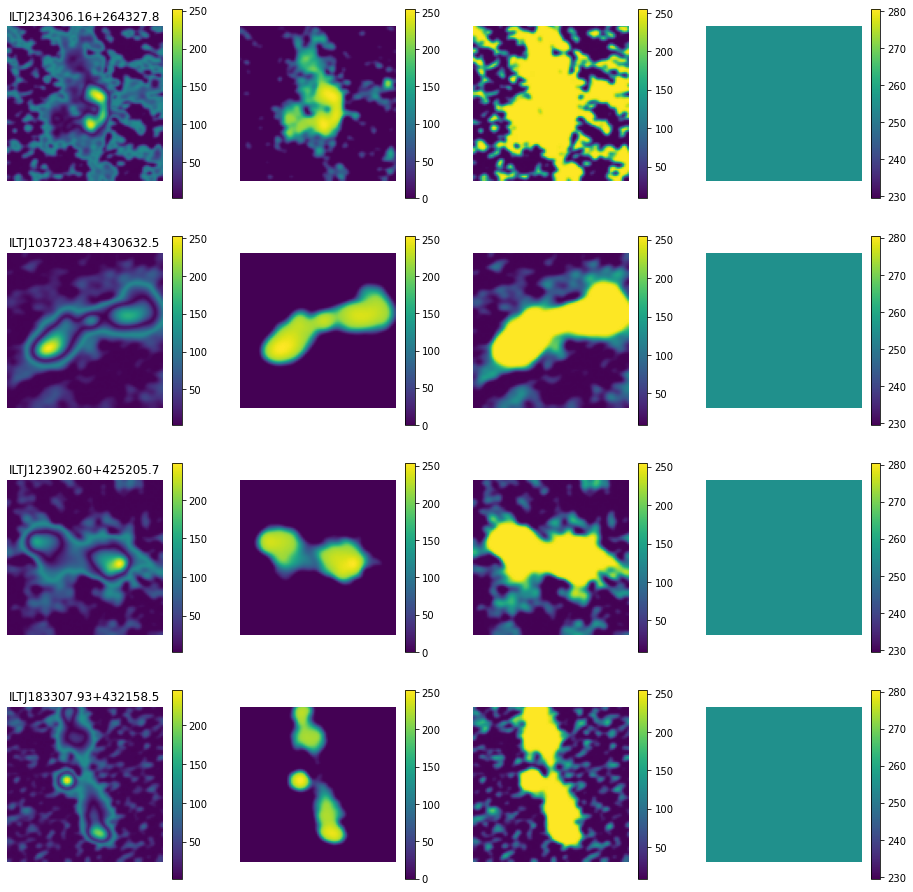

In [6]:
# Decompose the color channels

rd_idx = np.random.choice(n_images, size=16, replace=False)
figure(figsize=(16,16))
for i in range(4):
    tmp_img = Image.open(f"{imgpath}/{all_img[rd_idx[i]]}", 'r')
    for j in range(4):
        subplot(4,4,1+j+i*4)
        axis('off')
        if j==0: title(all_img[rd_idx[i]][:-4])
        imshow(np.asarray(tmp_img)[...,j])
        colorbar()

## Now checkout the labels

In [12]:
labels = pd.read_csv(f"{dataroot}{'classifications_horton_et_al_2025.csv'}")
print(labels.columns)

Index(['Source_Name', 'z_best', 'Size', 'angular_size', 'L_144', 'Mass_median',
       'flag_mass', 'fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped',
       'sshaped', 'misaligned', 'wings', 'xshaped', 'straight',
       'multihotspots', 'continuous', 'banding', 'onesided', 'restarted',
       'cluster', 'merger', 'diffuse', 'unknown', 'featurecount', 'hasanyone',
       'hasanytwo', 'hasall', 'has_exactly_1', 'has_exactly_2', 'se', 'ms',
       'em'],
      dtype='object')


In [13]:
labels

,Source_Name,z_best,Size,angular_size,L_144,Mass_median,flag_mass,fri,frii,hybrid,...,unknown,featurecount,hasanyone,hasanytwo,hasall,has_exactly_1,has_exactly_2,se,ms,em
0,ILTJ000005.31+205913.2,0.432343,573.768698,101.949905,7.565640e+25,NaN,False,False,False,True,...,False,1,False,False,False,False,False,False,False,False
1,ILTJ000032.63+351901.7,0.232263,351.150841,94.866341,2.386636e+25,NaN,False,True,False,False,...,False,2,False,False,False,False,False,False,False,False
2,ILTJ000043.32+332603.9,0.252191,571.093013,145.121946,1.518521e+25,11.396078,True,True,False,False,...,False,2,False,False,False,False,False,False,False,False
3,ILTJ000104.16+273449.7,0.538799,1221.005504,192.411780,1.256614e+27,11.447244,True,False,True,False,...,False,4,True,True,True,False,False,True,True,True
4,ILTJ000107.24+340152.1,0.182558,693.800425,226.023964,2.819642e+25,11.068277,True,False,False,True,...,False,1,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,ILTJ235902.95+225420.5,0.174365,1076.992345,364.061929,2.001145e+25,11.485074,True,True,False,False,...,False,1,False,False,False,False,False,False,False,False
7609,ILTJ235937.49+300227.3,0.301459,364.228536,81.496225,1.102059e+26,10.634567,False,False,True,False,...,False,2,False,False,False,False,False,False,False,False
7610,ILTJ235942.98+292111.6,0.209755,268.865558,78.516034,1.383696e+25,NaN,False,True,False,False,...,False,2,False,False,False,False,False,False,False,False
7611,ILTJ235943.05+193223.8,0.279624,437.353126,103.148965,5.788244e+25,11.503943,True,True,False,False,...,False,3,True,False,False,True,False,False,False,False


total number of labels 8356


<BarContainer object of 5 artists>

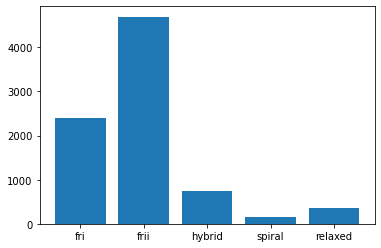

In [23]:
base_classes = ['fri', 'frii', 'hybrid', 'spiral', 'relaxed']
counts_base_classes = labels[base_classes].values.sum(axis=0)
print(f"total number of labels {np.sum(counts_base_classes)}")
bar(['fri', 'frii', 'hybrid', 'spiral', 'relaxed'], counts_base_classes, width=0.8, bottom=None,align='center')

Text(0, 0.5, 'Class i')

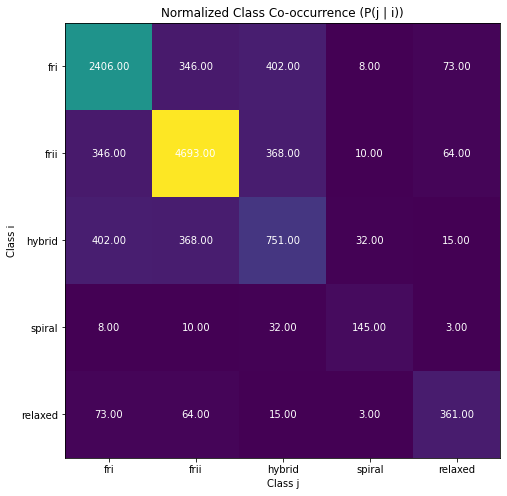

In [29]:
Y = labels[base_classes].values.astype(int)

# Co-occurrence matrix: (n_classes x n_classes)
co_matrix = Y.T @ Y

# Avoid division by zero
row_sums = co_matrix.diagonal().reshape(-1, 1)
norm_matrix = co_matrix / np.where(row_sums == 0, 1, row_sums)

figure(figsize=(8, 8))
imshow(co_matrix, interpolation='nearest', vmin=0, vmax=None)
colorbar(im, ax=ax)

xticks(np.arange(len(base_classes)), labels=base_classes)
yticks(np.arange(len(base_classes)), labels=base_classes)

setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(base_classes)):
    for j in range(len(base_classes)):
        text(j, i, f"{co_matrix[i, j]:.2f}",
                ha="center", va="center",
                color="white" if norm_matrix[i, j] > 0.5 else "white")

title("Normalized Class Co-occurrence (P(j | i))")
xlabel("Class j")
ylabel("Class i")



**$\Rightarrow$ Multiple labels coexist for different datasets**